In [8]:
import openpyxl
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

In [ ]:
depURL="https://www.ons.gov.uk/file?uri=%2fpeoplepopulationandcommunity%2fbirthsdeathsandmarriages%2fdeaths%2fdatasets%2fdeathsinvolvingcovid19bylocalareaanddeprivation%2f1march2020to31may2020/referencetablesworkbook1.xlsx"
depRequest=requests.get(depURL)
output=open('../data/covid_deprivation_gender.xlsx','wb')
output.write(depRequest.content)
output.close()

In [ ]:
depDF=pd.read_excel('../data/covid_deprivation_gender.xlsx',"Table 3")
depDF=depDF.drop([0,1])
depDF.index=np.arange(0,len(depDF))
droprange=np.arange(92,114)
depDF.drop(droprange,inplace=True)
new_header = depDF.iloc[0] #grab the first row for the header
depDF = depDF[1:] #take the data less the header row
depDF.columns = new_header #set the header row as the df header

In [ ]:
newColumnList=['Cause of death',
 'Sex',
 'Decile',
 1,
 'MarchDeaths',
 'MarchRate',
 'MarchNaN',
 'MarchLowCI',
 'MarchUpperCI',
 'MarchNaN2',
 'AprilDeaths',
 'AprilRate',
 'AprilNaN',
 'AprilLowCI',
 'AprilUpperCI',
 'AprilNaN2',
 'MayDeaths',
 'MayRate',
 'MayNaN',
 'MayLowCI',
 'MayUpperCI',
 'MayNaN2',
 'MarchMayDeaths',
 'MarchMayRate',
 'MarchMayNaN',
 'MarchMayLowCI',
 'MarchMayUpperCI']

In [ ]:
depDF.columns=newColumnList
covDepDF=depDF[['Cause of death','Sex','Decile','MarchMayDeaths','MarchMayRate','MarchMayLowCI','MarchMayUpperCI']]
covDepDF.columns=['DeathCause','Sex','Decile','Deaths','Rate','LowerCI','UpperCI']
covDepDF=covDepDF.fillna("")
covDepDF=covDepDF[covDepDF['DeathCause'].str.match("COVID-19")]
covDepDF.Decile=list(np.arange(1,11))*3
covDepDF["Deaths"] = pd.to_numeric(covDepDF["Deaths"])
covDepDF["Rate"]=pd.to_numeric(covDepDF["Rate"])
covDepDF["LowerCI"]=pd.to_numeric(covDepDF["LowerCI"])
covDepDF["UpperCI"]=pd.to_numeric(covDepDF["UpperCI"])
covDepDF.index=np.arange(0,len(covDepDF))
covDepDF=covDepDF.drop(columns='DeathCause')

In [13]:
covDepDF.head(5)

,Sex,Decile,Deaths,Rate,LowerCI,UpperCI
0,Persons,1,4801,128.3,124.7,132.0
1,Persons,2,5123,124.8,121.4,128.3
2,Persons,3,5100,114.5,111.3,117.6
3,Persons,4,4385,88.3,85.7,90.9
4,Persons,5,4346,80.3,78.0,82.7


In [ ]:
#covDepDF.to_csv("../data/deaths_by_gender_deprivationDecile.csv",index=False)

In [3]:
covDepDF=pd.read_csv("../data/deaths_by_gender_deprivationDecile.csv")

In [4]:
covDepAll=covDepDF[covDepDF['Sex'].str.match('Persons')].drop(columns="Sex")
covDepMen=covDepDF[covDepDF['Sex'].str.match('Males')].drop(columns="Sex")
covDepWomen=covDepDF[covDepDF['Sex'].str.match('Females')].drop(columns="Sex")

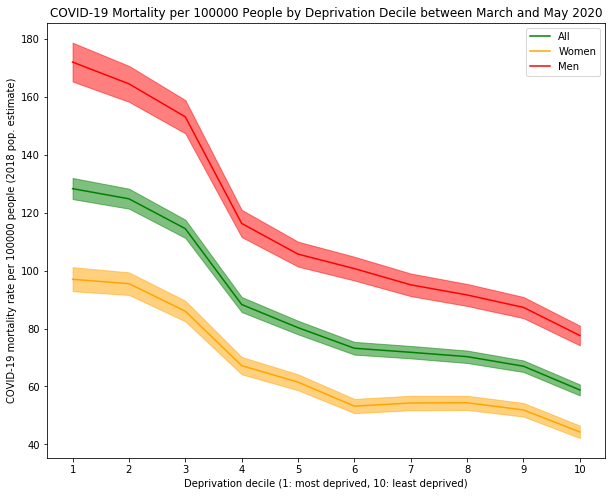

In [15]:
plt.figure(None,[10,8])
ax=plt.gca()
plt.plot(covDepAll['Decile'].tolist(),covDepAll['Rate'].tolist(),"Green")
plt.fill_between(covDepAll['Decile'].tolist(),covDepAll['LowerCI'],covDepAll['UpperCI'],color="Green",alpha=0.5)
plt.plot(covDepWomen['Decile'].tolist(),covDepWomen['Rate'].tolist(),"Orange")
plt.fill_between(covDepWomen['Decile'].tolist(),covDepWomen['LowerCI'],covDepWomen['UpperCI'],color="Orange",alpha=0.5)
plt.plot(covDepMen['Decile'].tolist(),covDepMen['Rate'].tolist(),"Red")
plt.fill_between(covDepMen['Decile'].tolist(),covDepMen['LowerCI'],covDepMen['UpperCI'],color="Red",alpha=0.5)
plt.title("COVID-19 Mortality per 100000 People by Deprivation Decile between March and May 2020")
ax.set_ylabel("COVID-19 mortality rate per 100000 people (2018 pop. estimate)")
ax.set_xlabel("Deprivation decile (1: most deprived, 10: least deprived)")
ax.legend(['All','Women','Men'])
newticks=np.arange(1,11,1.0).tolist()
plt.xticks(newticks)
plt.draw()
plt.show()